**Module 2: Edge-based Segmentation**

* **Theoretical Deep Dive:**
    1.  How do image derivatives relate to edge detection? Explain the concept of gradient magnitude and direction.
    2.  Differentiate between first-order (e.g., Sobel, Prewitt, Roberts) and second-order (e.g., Laplacian, LoG) edge detectors. What are the advantages and disadvantages of each?
    3.  Explain the four main steps of the Canny edge detection algorithm: Noise Reduction, Gradient Calculation, Non-maximum Suppression, and Hysteresis Thresholding. Why is Canny often considered an "optimal" edge detector?
    4.  What are the limitations of purely edge-based segmentation methods for forming complete regions?

* **Practical Implementation/Application:**
    1.  **Basic Edge Detectors:**
        * Load a grayscale image.
        * Apply Sobel, Prewitt, and Roberts operators (use `cv2.filter2D` with custom kernels if `cv2.Sobel` isn't enough, or directly `cv2.Sobel`). Display the resulting edge maps.
        * Calculate and display the gradient magnitude and direction images for one of these operators.
    2.  **Laplacian and LoG:**
        * Apply the Laplacian operator (`cv2.Laplacian`) to an image.
        * Apply Gaussian blur (`cv2.GaussianBlur`) followed by Laplacian (LoG). Experiment with different Gaussian kernel sizes. Display and compare the results.
    3.  **Canny Edge Detector:**
        * Apply `cv2.Canny` to an image.
        * **Experiment:** Systematically vary the `low_threshold` and `high_threshold` values and observe their impact on the detected edges. Pay attention to how the hysteresis linking works.
        * **Challenge (Conceptual Implementation):** For non-maximum suppression, describe the algorithm in pseudocode. For hysteresis thresholding, describe how it uses the two thresholds to connect weak edges to strong ones.

* **Analytical Challenges:**
    1.  **Comparison:** Compare the edge maps produced by Sobel, Laplacian, and Canny. Discuss their sensitivity to noise, edge thickness, and continuity.
    2.  **Segmentation Challenge:** Take an image where you *only* apply an edge detector. Can you directly segment objects based solely on these edges? What are the missing pieces?
    3.  **Preprocessing Impact:** How does applying a Gaussian blur *before* edge detection (as in Canny or LoG) affect the results? Why is this a common pre-processing step?



In [29]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import os
from pathlib import Path
from glob import glob
import random

In [30]:
path = Path('../data')

In [31]:
images = list(path.glob('BSR/BSDS500/data/images/train/*.jpg'))
len(images)

200

../data/BSR/BSDS500/data/images/train/24063.jpg


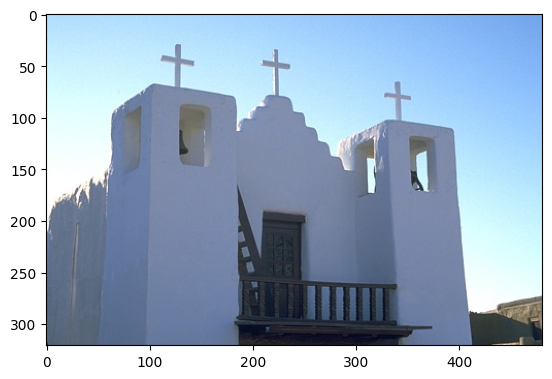

In [33]:
sample_path = random.choice(images)
print(sample_path)
img1 = cv2.imread(sample_path)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

# Basic Edge Detectors

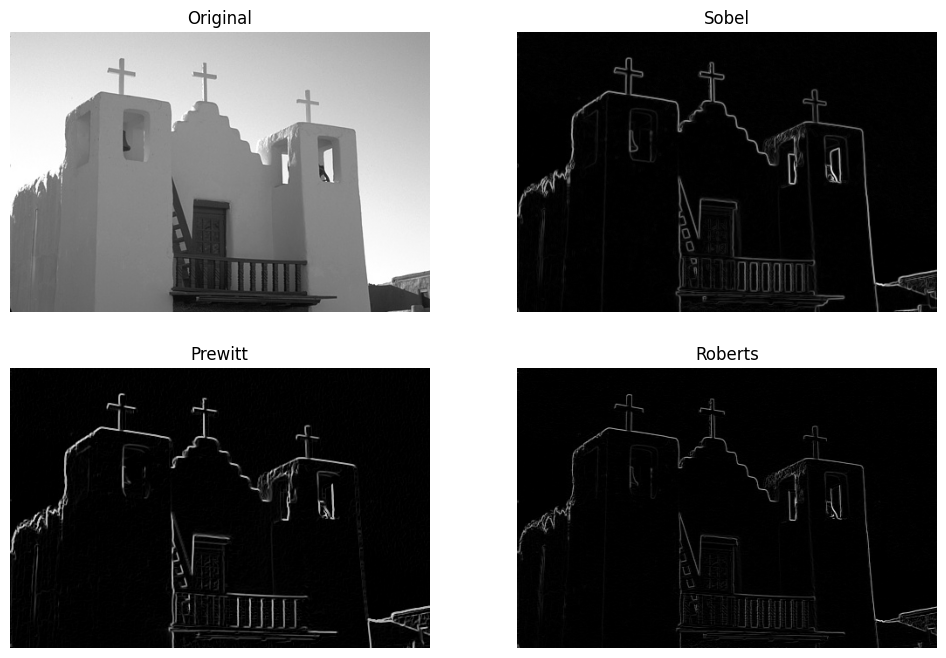

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)

# -------------------------------------
# 1. Sobel Operator (OpenCV built-in)
# -------------------------------------
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

# -------------------------------------
# 2. Prewitt Operator (custom kernels)
# -------------------------------------
prewitt_x = np.array([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]], dtype=np.float32)
prewitt_y = np.array([[1,  1,  1],
                      [0,  0,  0],
                      [-1, -1, -1]], dtype=np.float32)
prewitt_x_img = cv2.filter2D(img, -1, prewitt_x)
prewitt_y_img = cv2.filter2D(img, -1, prewitt_y)
prewitt = cv2.magnitude(np.float32(prewitt_x_img), np.float32(prewitt_y_img))

# -------------------------------------
# 3. Roberts Operator (custom 2x2 kernels)
# -------------------------------------
roberts_x = np.array([[1, 0],
                      [0, -1]], dtype=np.float32)
roberts_y = np.array([[0, 1],
                      [-1, 0]], dtype=np.float32)
roberts_x_img = cv2.filter2D(img, -1, roberts_x)
roberts_y_img = cv2.filter2D(img, -1, roberts_y)
roberts = cv2.magnitude(np.float32(roberts_x_img), np.float32(roberts_y_img))

# -------------------------------------
# Plot all edge maps
# -------------------------------------
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.axis('off')

plt.subplot(2, 2, 2), plt.imshow(sobel, cmap='gray')
plt.title('Sobel'), plt.axis('off')

plt.subplot(2, 2, 3), plt.imshow(prewitt, cmap='gray')
plt.title('Prewitt'), plt.axis('off')

plt.subplot(2, 2, 4), plt.imshow(roberts, cmap='gray')
plt.title('Roberts'), plt.axis('off')

plt.show()


#  Laplacian and LoG

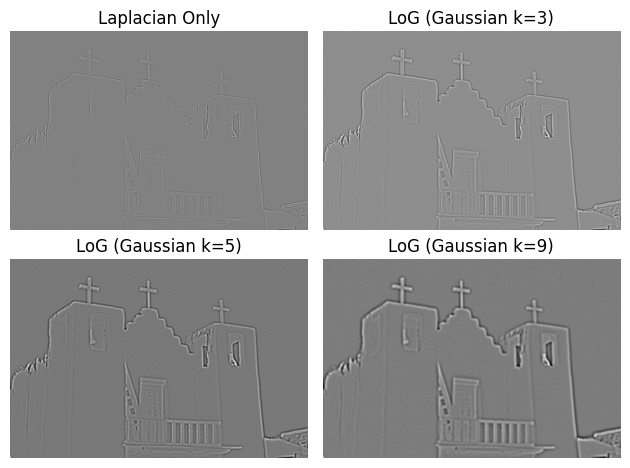

In [41]:
# convert to greyscale
img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)

# Apply Laplacian directly
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Apply Gaussian Blur + Laplacian (LoG) with different kernel sizes
kernel_sizes = [3, 5, 9]
log_results = []

for k in kernel_sizes:
    blurred = cv2.GaussianBlur(img, (k, k), 0)
    log = cv2.Laplacian(blurred, cv2.CV_64F)
    log_results.append((k, log))

plt.subplot(2, 2, 1)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Only')
plt.axis('off')

for i, (k, log_img) in enumerate(log_results):
    plt.subplot(2, 2, i + 2)
    plt.imshow(log_img, cmap='gray')
    plt.title(f'LoG (Gaussian k={k})')
    plt.axis('off')

plt.tight_layout()
plt.show()


# Canny Edge Detector

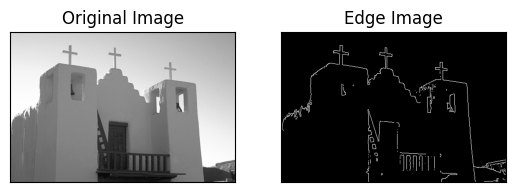

In [42]:
# convert to greyscale
img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)

high_th = [100, 200, 250]
edges = cv2.Canny(img, 220, 220)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

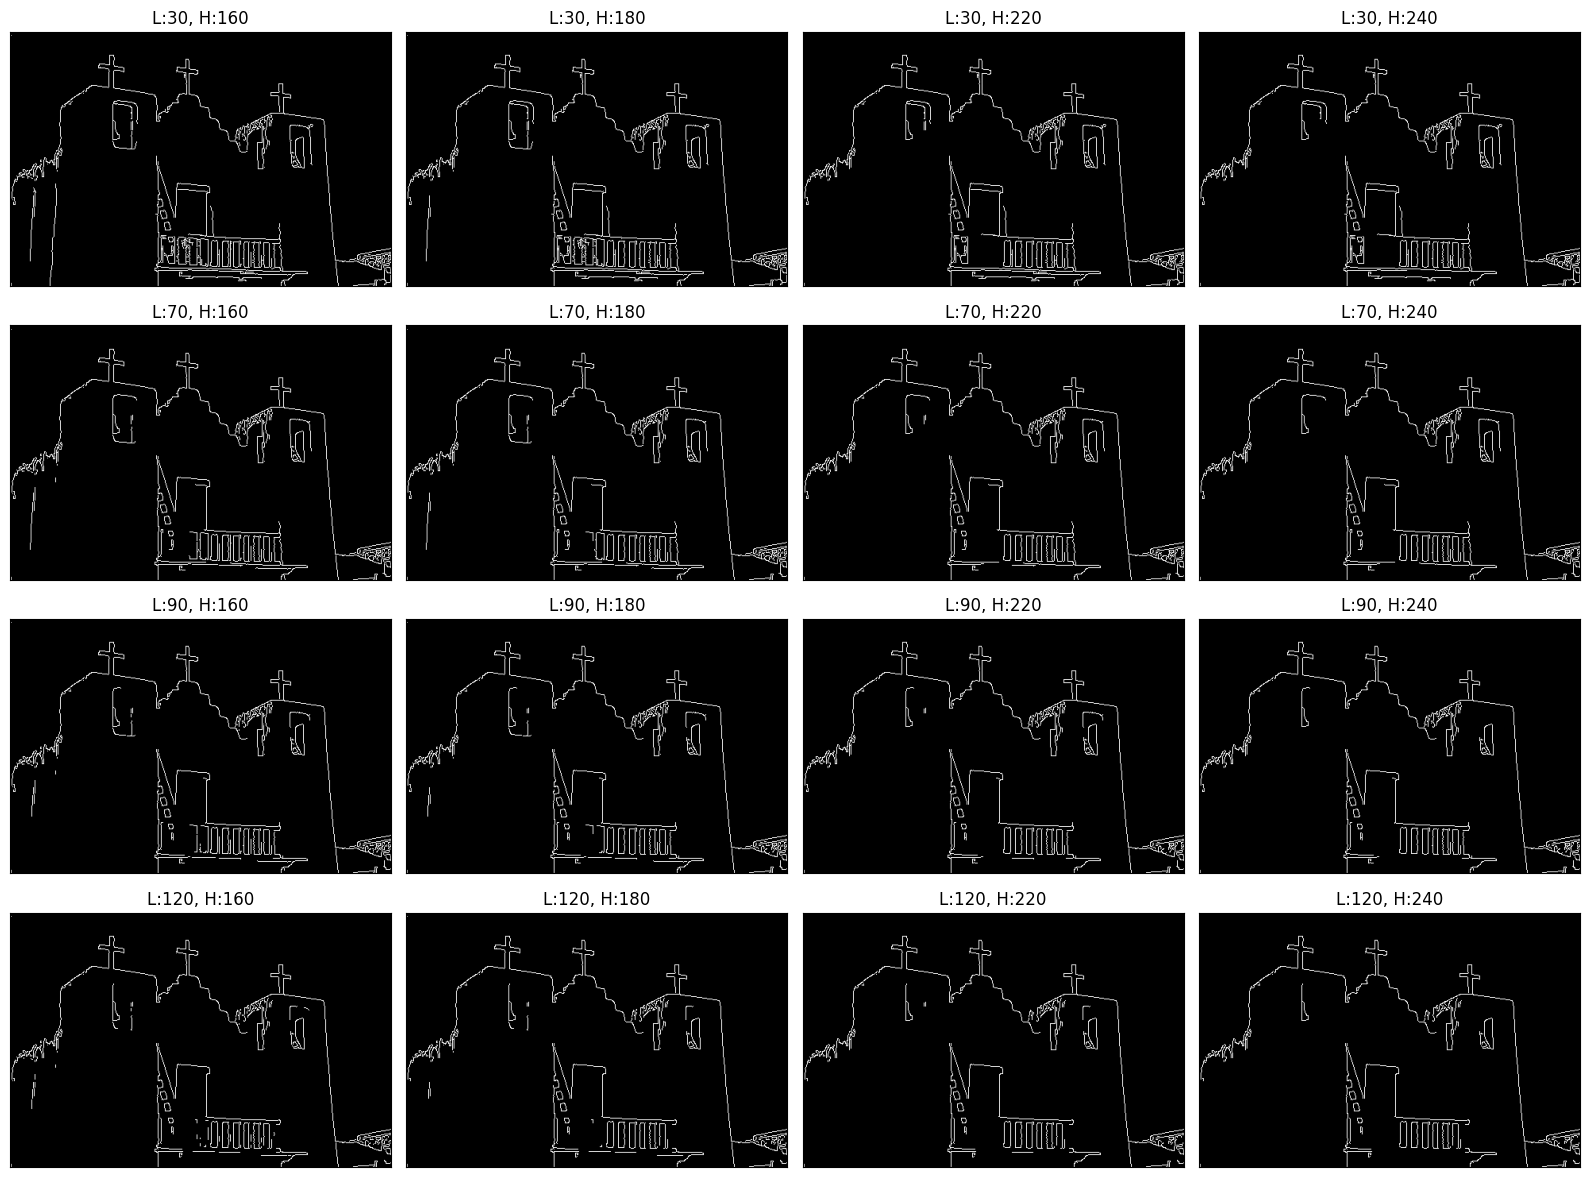

In [44]:
# Already used thresholds to exclude
used_low = {50, 100, 150, 200}
used_high = {100, 200, 250}

# Create fresh low/high threshold pairs
low_values = [30, 70, 90, 120]
high_values = [160, 180, 220, 240]

results = []
titles = []

for low in low_values:
    for high in high_values:
        if low >= high or low in used_low or high in used_high:
            continue
        edge = cv2.Canny(img, low, high)
        results.append(edge)
        titles.append(f"L:{low}, H:{high}")

# Plotting
cols = 4
rows = (len(results) + cols - 1) // cols
plt.figure(figsize=(4 * cols, 3 * rows))

for i, (edge, title) in enumerate(zip(results, titles)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(edge, cmap='gray')
    plt.title(title)
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()
